<a href="https://colab.research.google.com/github/IJSK10/Analyzing-Classification-and-Feature-Selection-Strategies-for-Diabetes-Prediction/blob/main/Dataset3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
string_to_int= preprocessing.LabelEncoder()
import matplotlib.pyplot as pyplot

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer

import shap

In [ ]:

pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c62b74f4ba5c7268fa9141a77cfcefc303d6f146d3b71d3462a675dc56f31296
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv("/content/Dataset-3-diabetes-categorical input.csv")


In [ ]:
#pre processing
X1 = data.drop(columns=['class'])
M=data['class']
print(X1)
data=data.apply(string_to_int.fit_transform)
print(data)
X = data.drop(columns=['class'])
y = data['class']

     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritabi

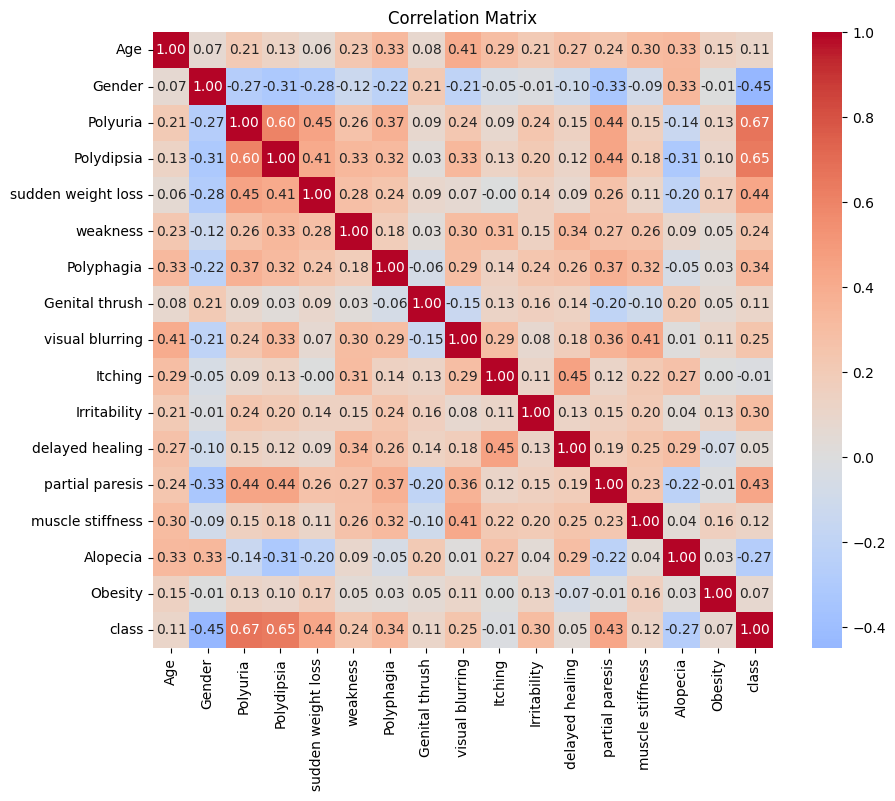

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

               Feature  Importance
2             Polyuria    0.203702
3           Polydipsia    0.202658
1               Gender    0.104876
0                  Age    0.095522
12     partial paresis    0.055078
4   sudden weight loss    0.052379
14            Alopecia    0.044073
10        Irritability    0.039392
6           Polyphagia    0.030942
8      visual blurring    0.030147
9              Itching    0.029924
11     delayed healing    0.028387
13    muscle stiffness    0.026561
7       Genital thrush    0.021007
5             weakness    0.018950
15             Obesity    0.016403


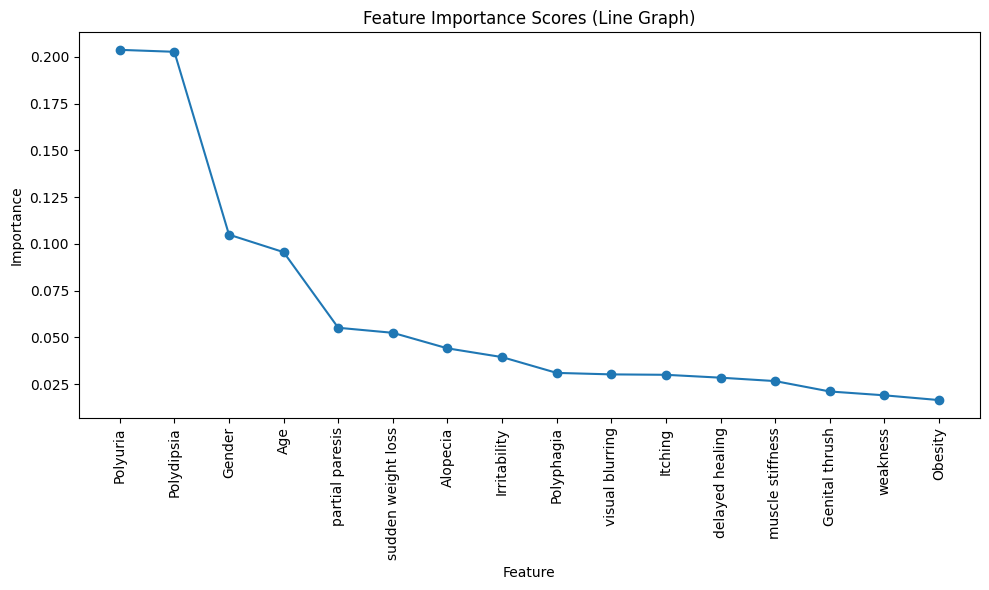

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
feature_importances1 = clf.feature_importances_
feature_importance_df1 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances1})
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)
print(feature_importance_df1)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df1['Feature'], feature_importance_df1['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

               Feature  Importance
2             Polyuria    0.370666
3           Polydipsia    0.204070
1               Gender    0.072856
14            Alopecia    0.053124
11     delayed healing    0.038978
4   sudden weight loss    0.038720
10        Irritability    0.035421
15             Obesity    0.034447
13    muscle stiffness    0.029246
7       Genital thrush    0.029079
8      visual blurring    0.025749
9              Itching    0.018434
0                  Age    0.017076
5             weakness    0.015114
12     partial paresis    0.009008
6           Polyphagia    0.008011


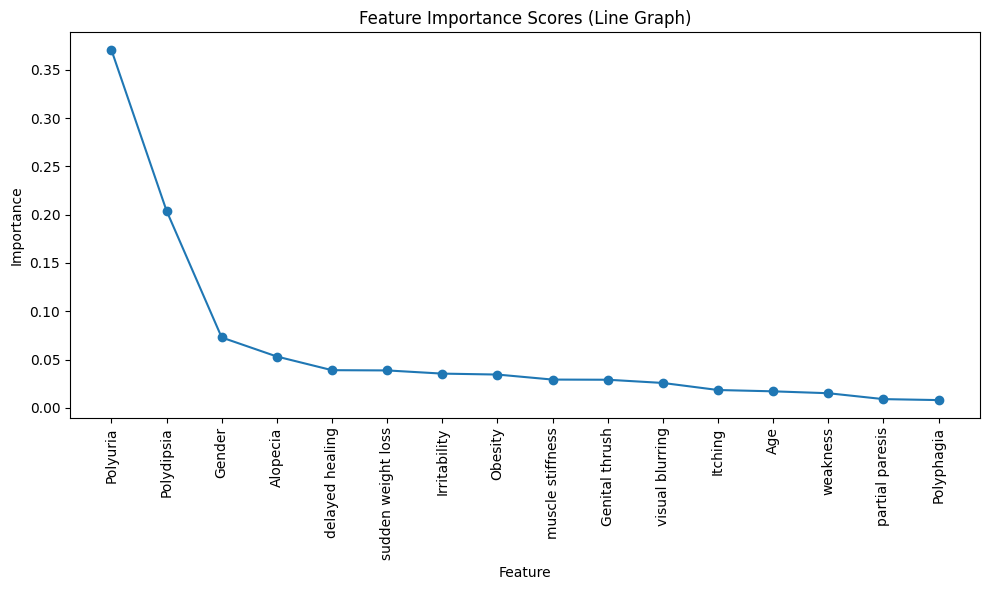

In [ ]:
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances2 = model.feature_importances_
feature_importance_df2 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances2})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)
print(feature_importance_df2)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df2['Feature'], feature_importance_df2['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

               Feature  Importance
2             Polyuria    0.361552
3           Polydipsia    0.254210
1               Gender    0.121806
0                  Age    0.061679
14            Alopecia    0.060786
10        Irritability    0.034735
7       Genital thrush    0.015284
5             weakness    0.014998
4   sudden weight loss    0.014782
15             Obesity    0.013233
11     delayed healing    0.012047
9              Itching    0.011549
13    muscle stiffness    0.006636
6           Polyphagia    0.006354
12     partial paresis    0.005292
8      visual blurring    0.005056


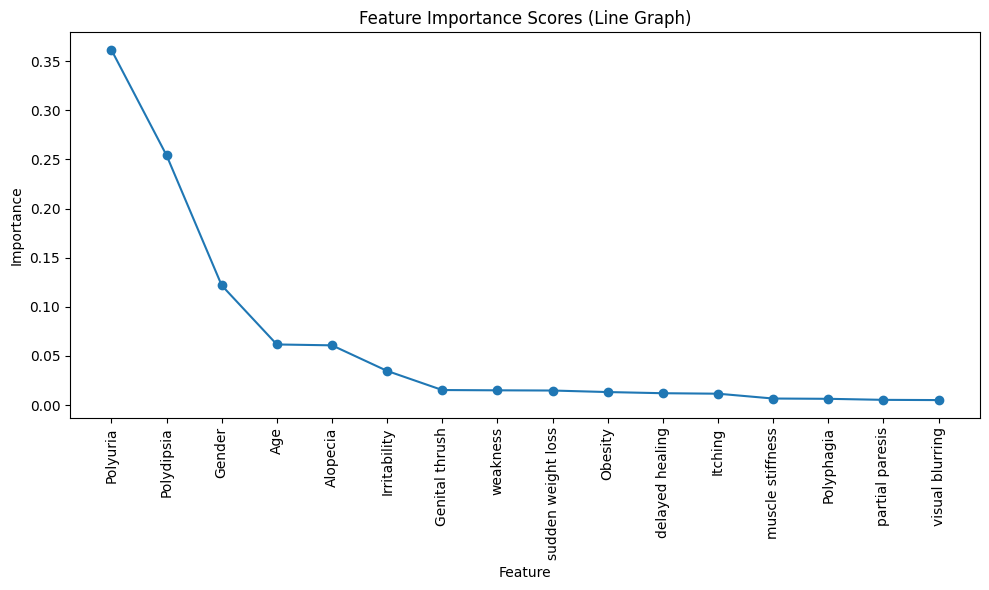

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances3 = model.feature_importances_
feature_importance_df3 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances3})
feature_importance_df3 = feature_importance_df3.sort_values(by='Importance', ascending=False)
print(feature_importance_df3)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df3['Feature'], feature_importance_df3['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

Age : 0.0569
Polyuria : 0.0458
Polydipsia : 0.0304
Polyphagia : 0.0281
partial paresis : 0.0277
Gender : 0.0258
Alopecia : 0.0254
visual blurring : 0.0246
sudden weight loss : 0.0219
muscle stiffness : 0.0169
Irritability : 0.0100
weakness : 0.0031
Genital thrush : 0.0027
Itching : 0.0019
delayed healing : 0.0008
Obesity : 0.0000


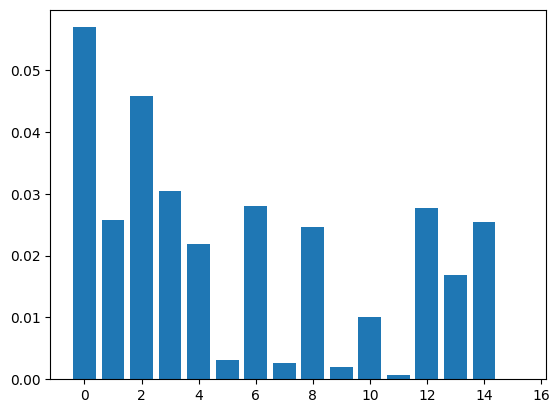

In [ ]:
model = SVC()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
l1=[]
# summarize feature importance
for i,v in enumerate(importance):
    l1=l1+[abs(v)]
zipped=zip(X.columns,l1)
zipped = list(zipped)

# Printing zipped list

# Using sorted and lambda
res = sorted(zipped, key = lambda x: x[1],reverse=True)

for feature, importances in res:
  print(f"{feature} : {importances:.4f}")

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
model = LinearRegression()

# Train the Linear Regression model on the training data
model.fit(X, y)

# Get the feature importances (coefficients)
feature_importances = model.coef_
feature_importances4 = model.coef_
feature_importances4=abs(feature_importances4)


zipped=zip(X.columns,abs(feature_importances))
zipped = list(zipped)

# Printing zipped list

# Using sorted and lambda
res = sorted(zipped, key = lambda x: x[1],reverse=True)

for feature, importance in res:
  print(f"{feature} : {importance:.4f}")

Polyuria : 0.3191
Polydipsia : 0.2791
Gender : 0.2608
Genital thrush : 0.1785
Irritability : 0.1559
Itching : 0.1152
delayed healing : 0.0855
partial paresis : 0.0651
visual blurring : 0.0590
Obesity : 0.0526
sudden weight loss : 0.0460
Polyphagia : 0.0445
weakness : 0.0251
muscle stiffness : 0.0230
Alopecia : 0.0041
Age : 0.0007


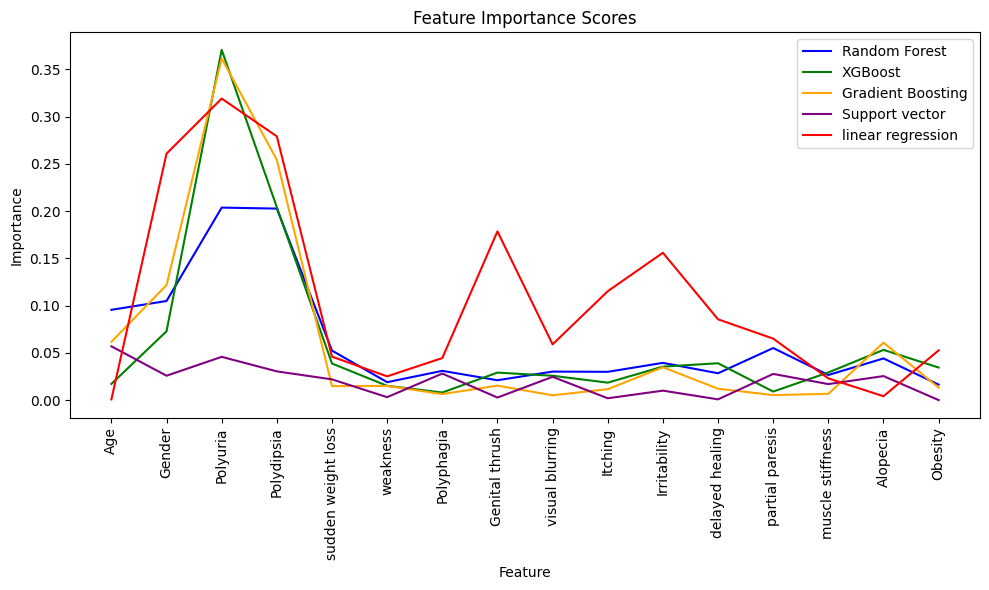

In [ ]:
plt.figure(figsize=(10, 6))

# Plot Random Forest scores in blue
plt.plot(X.columns, feature_importances1, color='blue', label='Random Forest')

# Plot XGBoost scores in green
plt.plot(X.columns, feature_importances2, color='green', label='XGBoost')

# Plot Gradient Boosting scores in orange
plt.plot(X.columns, feature_importances3, color='orange', label='Gradient Boosting')

plt.plot(X.columns, l1, color='purple', label='Support vector')

plt.plot(X.columns, feature_importances4, color='red', label='linear regression')

plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
#chisquare
k = 7
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [ 0  1  2  3  4 10 12]
Age
Gender
Polyuria
Polydipsia
sudden weight loss
Irritability
partial paresis


In [ ]:
#fischer's score
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [ 1  2  3  4  6 10 12]
Gender
Polyuria
Polydipsia
sudden weight loss
Polyphagia
Irritability
partial paresis


In [ ]:
#missing value
missing_threshold = 0.5
data1 = data[data.columns[data.isnull().mean() < missing_threshold]]
x = data.drop(columns=['class'])
data=data.apply(string_to_int.fit_transform)
q = data['class']
k =7
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(x, q)

# Get the indices of selected features
selected_indices = selector.get_support(indices=True)

# Print the indices of selected features
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [ 1  2  3  4  5  6 12]
Gender
Polyuria
Polydipsia
sudden weight loss
weakness
Polyphagia
partial paresis


In [ ]:
#information gain
def information_gain(X, y):
    def entropy(labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / np.sum(counts)
        return -np.sum(probabilities * np.log2(probabilities))

    def conditional_entropy(feature, labels):
        unique_feature_vals = np.unique(feature)
        conditional_entropies = []
        for value in unique_feature_vals:
            subset_labels = labels[feature == value]
            conditional_entropies.append(
                len(subset_labels) / len(labels) * entropy(subset_labels)
            )
        return np.sum(conditional_entropies)

    original_entropy = entropy(y)
    information_gains = []
    for feature_column in X.T:
        info_gain = original_entropy - conditional_entropy(feature_column, y)
        information_gains.append(info_gain)
    return information_gains

info_gains = information_gain(X.values, y.values)
sorted_indices = np.argsort(info_gains)[::-1]
k = 7
selected_indices = sorted_indices[:k]
X_new = X.iloc[:, selected_indices]
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [ 2  3  0  1  4 12  6]
Polyuria
Polydipsia
Age
Gender
sudden weight loss
partial paresis
Polyphagia


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred,average='weighted')
recall1 = recall_score(y_test, y_pred,average='weighted')

true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
f11 = f1_score(y_test, y_pred)
print("F1-score:", f11)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9807692307692307
Precision: 0.9818681318681318
Recall: 0.9807692307692307
F1-score: 0.9857142857142858
True Positives: 69
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 2 69]]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred,average='weighted')
recall2 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

f12 = f1_score(y_test, y_pred)
print("F1-score:", f12)

Accuracy: 0.9903846153846154
Precision: 0.9906674208144797
Recall: 0.9903846153846154
True Positives: 70
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 1 70]]
F1-score: 0.9929078014184397


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred,average='weighted')
recall3 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

f13 = f1_score(y_test, y_pred)
print("F1-score:", f13)

Accuracy: 0.9711538461538461
Precision: 0.9735576923076923
Recall: 0.9711538461538461
True Positives: 68
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 3 68]]
F1-score: 0.9784172661870503


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy4 = accuracy_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred,average='weighted')
recall4 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f14 = f1_score(y_test, y_pred)
print("F1-score:", f14)

Accuracy: 0.8942307692307693
Precision: 0.8952407886231415
Recall: 0.8942307692307693
True Positives: 65
False Positives: 5
Confusion Matrix:
 [[28  5]
 [ 6 65]]
F1-score: 0.921985815602837


<Figure size 4000x20000 with 0 Axes>

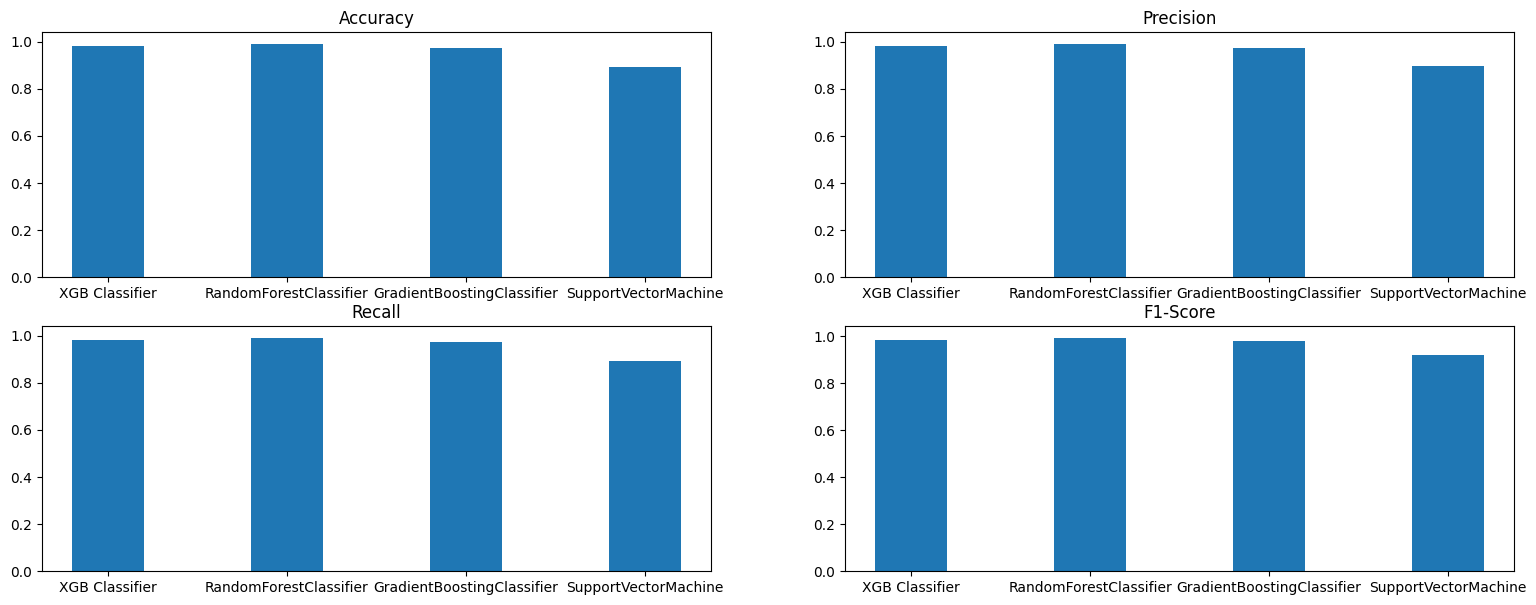

In [ ]:
plt.figure(figsize=(40, 200))
figure, axis = plt.subplots(2, 2, figsize=(19, 7))
X=["XGB Classifier","RandomForestClassifier","GradientBoostingClassifier","SupportVectorMachine"]
Y1=[accuracy1,accuracy2,accuracy3,accuracy4]
Y2=[precision1,precision2,precision3,precision4]
Y3=[recall1,recall2,recall3,recall4]
Y4=[f11,f12,f13,f14]
# For Sine Function
axis[0, 0].bar(X, Y1,width = 0.4)
axis[0, 0].set_title("Accuracy")

# For Cosine Function
axis[0, 1].bar(X, Y2,width = 0.4)
axis[0, 1].set_title("Precision")

# For Tangent Function
axis[1, 0].bar(X, Y3,width = 0.4)
axis[1, 0].set_title("Recall")

# For Tanh Function
axis[1, 1].bar(X, Y4,width = 0.4)
axis[1, 1].set_title("F1-Score")
# Combine all the operations and display
plt.show()

In [ ]:
#random forest
X1 = X[["Polyuria","Polydipsia","Gender","Age","partial paresis","sudden weight loss","Alopecia"]]
y = data['class']
print(X1)
print(y)


     Polyuria  Polydipsia  Gender  Age  partial paresis  sudden weight loss  \
0           0           1       1   16                0                   0   
1           0           0       1   34                1                   0   
2           1           0       1   17                0                   0   
3           0           0       1   21                0                   1   
4           1           1       1   36                1                   1   
..        ...         ...     ...  ...              ...                 ...   
515         1           1       0   15                1                   1   
516         1           1       0   24                1                   1   
517         1           1       0   34                1                   1   
518         0           0       0    8                0                   0   
519         0           0       1   18                0                   0   

     Alopecia  
0           1  
1           1  
2  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9615384615384616
Precision: 0.9629081063863674
Recall: 0.9615384615384616
True Positives: 68
False Positives: 1
Confusion Matrix:
 [[32  1]
 [ 3 68]]
F1-score: 0.9714285714285714


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9519230769230769
Precision: 0.9547039969834087
Recall: 0.9519230769230769
True Positives: 67
False Positives: 1
Confusion Matrix:
 [[32  1]
 [ 4 67]]
F1-score: 0.9640287769784172


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9807692307692307
Precision: 0.9818681318681318
Recall: 0.9807692307692307
True Positives: 69
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 2 69]]
F1-score: 0.9857142857142858


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9230769230769231
Precision: 0.923501326259947
Recall: 0.9230769230769231
True Positives: 69
False Positives: 6
Confusion Matrix:
 [[27  6]
 [ 2 69]]
F1-score: 0.9452054794520549


In [ ]:
#XGBClassifier
X1 = X[["Polyuria","Polydipsia","Gender","Alopecia","delayed healing","sudden weight loss","Irritability"]]
y = data['class']
print(X1)
print(y)

     Polyuria  Polydipsia  Gender  Alopecia  delayed healing  \
0           0           1       1         1                1   
1           0           0       1         1                0   
2           1           0       1         1                1   
3           0           0       1         0                1   
4           1           1       1         1                1   
..        ...         ...     ...       ...              ...   
515         1           1       0         0                1   
516         1           1       0         0                1   
517         1           1       0         0                0   
518         0           0       0         1                1   
519         0           0       1         0                0   

     sudden weight loss  Irritability  
0                     0             0  
1                     0             0  
2                     0             0  
3                     1             0  
4                     1        

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9423076923076923
Precision: 0.9439480809046027
Recall: 0.9423076923076923
True Positives: 67
False Positives: 2
Confusion Matrix:
 [[31  2]
 [ 4 67]]
F1-score: 0.9571428571428571


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9326923076923077
Precision: 0.9358503016591252
Recall: 0.9326923076923077
True Positives: 66
False Positives: 2
Confusion Matrix:
 [[31  2]
 [ 5 66]]
F1-score: 0.9496402877697842


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9326923076923077
Precision: 0.9358503016591252
Recall: 0.9326923076923077
True Positives: 66
False Positives: 2
Confusion Matrix:
 [[31  2]
 [ 5 66]]
F1-score: 0.9496402877697842


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9326923076923077
Precision: 0.9334114414996768
Recall: 0.9326923076923077
True Positives: 67
False Positives: 3
Confusion Matrix:
 [[30  3]
 [ 4 67]]
F1-score: 0.9503546099290779


In [ ]:
#Gradient Boosting
X1 = X[["Polyuria","Polydipsia","Gender","Age","Alopecia","Irritability","Genital thrush"]]
y = data['class']
print(X1)
print(y)

     Polyuria  Polydipsia  Gender  Age  Alopecia  Irritability  Genital thrush
0           0           1       1   16         1             0               0
1           0           0       1   34         1             0               0
2           1           0       1   17         1             0               0
3           0           0       1   21         0             0               1
4           1           1       1   36         1             1               0
..        ...         ...     ...  ...       ...           ...             ...
515         1           1       0   15         0             0               0
516         1           1       0   24         0             1               0
517         1           1       0   34         0             0               0
518         0           0       0    8         1             0               0
519         0           0       1   18         0             0               0

[520 rows x 7 columns]
0      1
1      1
2      1
3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9903846153846154
Precision: 0.9906674208144797
Recall: 0.9903846153846154
True Positives: 70
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 1 70]]
F1-score: 0.9929078014184397


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9903846153846154
Precision: 0.9906674208144797
Recall: 0.9903846153846154
True Positives: 70
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 1 70]]
F1-score: 0.9929078014184397


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9807692307692307
Precision: 0.9818681318681318
Recall: 0.9807692307692307
True Positives: 69
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 2 69]]
F1-score: 0.9857142857142858


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9230769230769231
Precision: 0.923501326259947
Recall: 0.9230769230769231
True Positives: 69
False Positives: 6
Confusion Matrix:
 [[27  6]
 [ 2 69]]
F1-score: 0.9452054794520549


In [ ]:
#SVM
X1 = X[["Polyuria","Polydipsia","Gender","Age","Polyphagia","sudden weight loss","Alopecia"]]
y = data['class']
print(X1)
print(y)

     Polyuria  Polydipsia  Gender  Age  Polyphagia  sudden weight loss  \
0           0           1       1   16           0                   0   
1           0           0       1   34           0                   0   
2           1           0       1   17           1                   0   
3           0           0       1   21           1                   1   
4           1           1       1   36           1                   1   
..        ...         ...     ...  ...         ...                 ...   
515         1           1       0   15           1                   1   
516         1           1       0   24           1                   1   
517         1           1       0   34           1                   1   
518         0           0       0    8           0                   0   
519         0           0       1   18           0                   0   

     Alopecia  
0           1  
1           1  
2           1  
3           0  
4           1  
..        ...  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9615384615384616
Precision: 0.9629081063863674
Recall: 0.9615384615384616
True Positives: 68
False Positives: 1
Confusion Matrix:
 [[32  1]
 [ 3 68]]
F1-score: 0.9714285714285714


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9519230769230769
Precision: 0.9524967679379444
Recall: 0.9519230769230769
True Positives: 68
False Positives: 2
Confusion Matrix:
 [[31  2]
 [ 3 68]]
F1-score: 0.9645390070921985


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9615384615384616
Precision: 0.9656964656964657
Recall: 0.9615384615384616
True Positives: 67
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 4 67]]
F1-score: 0.9710144927536231


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9230769230769231
Precision: 0.9308666017526778
Recall: 0.9230769230769231
True Positives: 71
False Positives: 8
Confusion Matrix:
 [[25  8]
 [ 0 71]]
F1-score: 0.9466666666666668


In [ ]:
#Linear regression
X1 = X[["Polyuria","Polydipsia","Gender","Genital thrush","Irritability","Itching","delayed healing"]]
y = data['class']
print(X1)
print(y)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

     Polyuria  Polydipsia  Gender  Genital thrush  Irritability  Itching  \
0           0           1       1               0             0        1   
1           0           0       1               0             0        0   
2           1           0       1               0             0        1   
3           0           0       1               1             0        1   
4           1           1       1               0             1        1   
..        ...         ...     ...             ...           ...      ...   
515         1           1       0               0             0        1   
516         1           1       0               0             1        1   
517         1           1       0               0             0        0   
518         0           0       0               0             0        1   
519         0           0       1               0             0        0   

     delayed healing  
0                  1  
1                  0  
2                 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9423076923076923
Precision: 0.9423076923076923
Recall: 0.9423076923076923
True Positives: 68
False Positives: 3
Confusion Matrix:
 [[30  3]
 [ 3 68]]
F1-score: 0.9577464788732394


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9711538461538461
Precision: 0.9715820943762121
Recall: 0.9711538461538461
True Positives: 69
False Positives: 1
Confusion Matrix:
 [[32  1]
 [ 2 69]]
F1-score: 0.9787234042553192


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9423076923076923
Precision: 0.9423076923076923
Recall: 0.9423076923076923
True Positives: 68
False Positives: 3
Confusion Matrix:
 [[30  3]
 [ 3 68]]
F1-score: 0.9577464788732394


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9423076923076923
Precision: 0.9469311446923386
Recall: 0.9423076923076923
True Positives: 66
False Positives: 1
Confusion Matrix:
 [[32  1]
 [ 5 66]]
F1-score: 0.9565217391304348


In [ ]:
#Chisquare
X1 = X[["Age","Gender","Polyuria","Polydipsia","sudden weight loss","Irritability","partial paresis"]]
y = data['class']
print(X1)
print(y)

     Age  Gender  Polyuria  Polydipsia  sudden weight loss  Irritability  \
0     16       1         0           1                   0             0   
1     34       1         0           0                   0             0   
2     17       1         1           0                   0             0   
3     21       1         0           0                   1             0   
4     36       1         1           1                   1             1   
..   ...     ...       ...         ...                 ...           ...   
515   15       0         1           1                   1             0   
516   24       0         1           1                   1             1   
517   34       0         1           1                   1             0   
518    8       0         0           0                   0             0   
519   18       1         0           0                   0             0   

     partial paresis  
0                  0  
1                  1  
2                 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9519230769230769
Precision: 0.9524967679379444
Recall: 0.9519230769230769
True Positives: 68
False Positives: 2
Confusion Matrix:
 [[31  2]
 [ 3 68]]
F1-score: 0.9645390070921985


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9615384615384616
Precision: 0.9615384615384616
Recall: 0.9615384615384616
True Positives: 69
False Positives: 2
Confusion Matrix:
 [[31  2]
 [ 2 69]]
F1-score: 0.971830985915493


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9807692307692307
Precision: 0.9818681318681318
Recall: 0.9807692307692307
True Positives: 69
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 2 69]]
F1-score: 0.9857142857142858


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9038461538461539
Precision: 0.9029453754376424
Recall: 0.9038461538461539
True Positives: 67
False Positives: 6
Confusion Matrix:
 [[27  6]
 [ 4 67]]
F1-score: 0.9305555555555556


In [ ]:
#fischer's score
X1 = X[["Gender","Polyuria","Polydipsia","sudden weight loss","Polyphagia","Irritability","partial paresis"]]
y = data['class']
print(X1)
print(y)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

     Gender  Polyuria  Polydipsia  sudden weight loss  Polyphagia  \
0         1         0           1                   0           0   
1         1         0           0                   0           0   
2         1         1           0                   0           1   
3         1         0           0                   1           1   
4         1         1           1                   1           1   
..      ...       ...         ...                 ...         ...   
515       0         1           1                   1           1   
516       0         1           1                   1           1   
517       0         1           1                   1           1   
518       0         0           0                   0           0   
519       1         0           0                   0           0   

     Irritability  partial paresis  
0               0                0  
1               0                1  
2               0                0  
3               0      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9423076923076923
Precision: 0.9511834319526626
Recall: 0.9423076923076923
True Positives: 65
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 6 65]]
F1-score: 0.9558823529411764


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9230769230769231
Precision: 0.9380863039399625
Recall: 0.9230769230769231
True Positives: 63
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 8 63]]
F1-score: 0.9402985074626865


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9326923076923077
Precision: 0.9358503016591252
Recall: 0.9326923076923077
True Positives: 66
False Positives: 2
Confusion Matrix:
 [[31  2]
 [ 5 66]]
F1-score: 0.9496402877697842


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.875
Precision: 0.8733108108108107
Recall: 0.875
True Positives: 66
False Positives: 8
Confusion Matrix:
 [[25  8]
 [ 5 66]]
F1-score: 0.9103448275862069


In [ ]:
#missing value
X1 = X[["Gender","Polyuria","Polydipsia","sudden weight loss","Irritability","partial paresis","Alopecia"]]
y = data['class']
print(X1)
print(y)

     Gender  Polyuria  Polydipsia  sudden weight loss  Irritability  \
0         1         0           1                   0             0   
1         1         0           0                   0             0   
2         1         1           0                   0             0   
3         1         0           0                   1             0   
4         1         1           1                   1             1   
..      ...       ...         ...                 ...           ...   
515       0         1           1                   1             0   
516       0         1           1                   1             1   
517       0         1           1                   1             0   
518       0         0           0                   0             0   
519       1         0           0                   0             0   

     partial paresis  Alopecia  
0                  0         1  
1                  1         1  
2                  0         1  
3              

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9519230769230769
Precision: 0.9547039969834087
Recall: 0.9519230769230769
True Positives: 67
False Positives: 1
Confusion Matrix:
 [[32  1]
 [ 4 67]]
F1-score: 0.9640287769784172


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9519230769230769
Precision: 0.9547039969834087
Recall: 0.9519230769230769
True Positives: 67
False Positives: 1
Confusion Matrix:
 [[32  1]
 [ 4 67]]
F1-score: 0.9640287769784172


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9423076923076923
Precision: 0.9469311446923386
Recall: 0.9423076923076923
True Positives: 66
False Positives: 1
Confusion Matrix:
 [[32  1]
 [ 5 66]]
F1-score: 0.9565217391304348


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8942307692307693
Precision: 0.8931133056133055
Recall: 0.8942307692307693
True Positives: 67
False Positives: 7
Confusion Matrix:
 [[26  7]
 [ 4 67]]
F1-score: 0.9241379310344827


In [ ]:
#information gain
X1 = X[["Polyuria","Polydipsia","Age","Gender","sudden weight loss","partial paresis","Polyphagia"]]
y = data['class']
print(X1)
print(y)

     Polyuria  Polydipsia  Age  Gender  sudden weight loss  partial paresis  \
0           0           1   16       1                   0                0   
1           0           0   34       1                   0                1   
2           1           0   17       1                   0                0   
3           0           0   21       1                   1                0   
4           1           1   36       1                   1                1   
..        ...         ...  ...     ...                 ...              ...   
515         1           1   15       0                   1                1   
516         1           1   24       0                   1                1   
517         1           1   34       0                   1                1   
518         0           0    8       0                   0                0   
519         0           0   18       1                   0                0   

     Polyphagia  
0             0  
1             0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9423076923076923
Precision: 0.9439480809046027
Recall: 0.9423076923076923
True Positives: 67
False Positives: 2
Confusion Matrix:
 [[31  2]
 [ 4 67]]
F1-score: 0.9571428571428571


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9230769230769231
Precision: 0.9281658236882117
Recall: 0.9230769230769231
True Positives: 65
False Positives: 2
Confusion Matrix:
 [[31  2]
 [ 6 65]]
F1-score: 0.9420289855072463


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9615384615384616
Precision: 0.9656964656964657
Recall: 0.9615384615384616
True Positives: 67
False Positives: 0
Confusion Matrix:
 [[33  0]
 [ 4 67]]
F1-score: 0.9710144927536231


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9230769230769231
Precision: 0.923501326259947
Recall: 0.9230769230769231
True Positives: 69
False Positives: 6
Confusion Matrix:
 [[27  6]
 [ 2 69]]
F1-score: 0.9452054794520549


In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
feature_names = list(X_train.columns)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create and train a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize a LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names =
                                 feature_names,
                                 mode = 'classification')


instance_idx = 13  # Change this to the index of the instance you want to explain

# Explain the model's prediction for the selected instance
#explanation = explainer.explain_instance(X_test.values[instance_idx], model.predict_proba, num_features=len(X.columns))
explanation = explainer.explain_instance(X_test.values[instance_idx], model.predict_proba, num_features=6)

# Print the explanation
explanation.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Variable Importance Plot - Global Interpretation


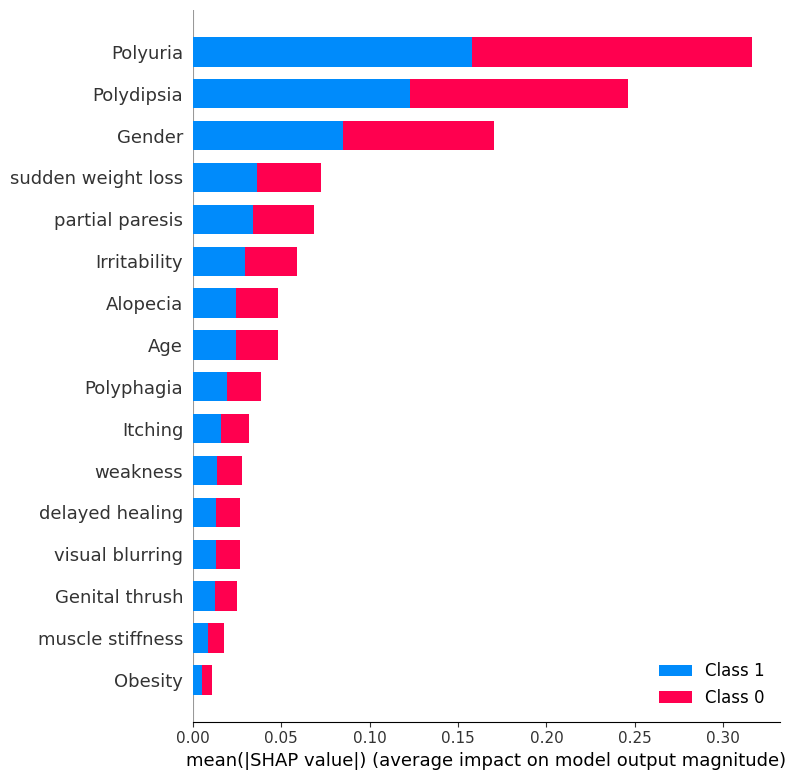

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize a SHAP explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

#shap.summary_plot(shap_values[1], X_test)


#shap.summary_plot(shap_values[1], X_test)

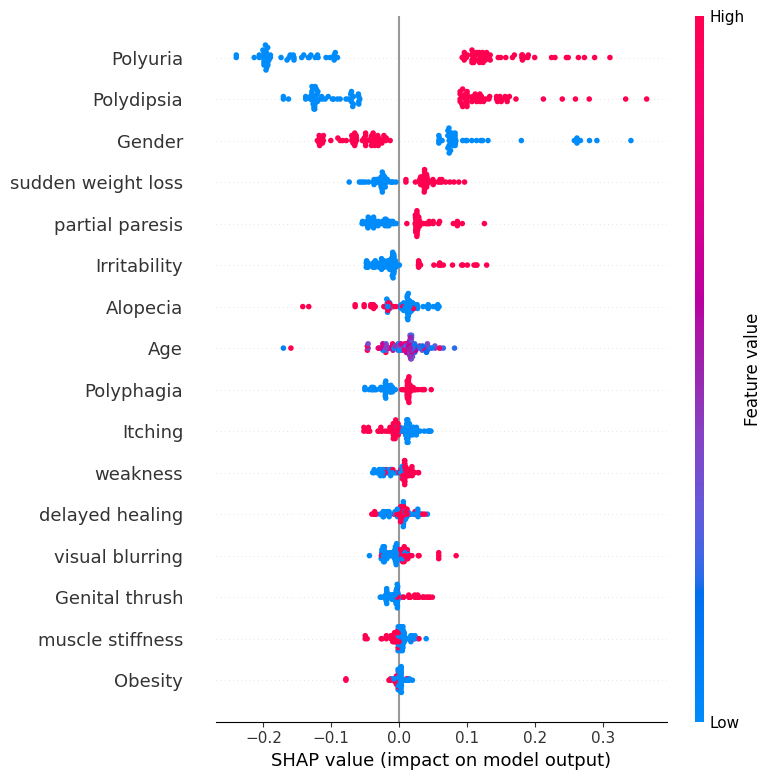

In [ ]:
shap.summary_plot(shap_values[1], X_test)